In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col, avg
from pyspark.sql.types import DoubleType
spark = SparkSession.builder.getOrCreate()

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

In [12]:
data1 = spark.read.format("csv").option("header", "true").load("C:/Users/s535981/Downloads/BigDataFinalProject/IMDB Top 250 Movies.csv")
data2 = spark.read.format("csv").option("header", "true").load("C:/Users/s535981/Downloads/BigDataFinalProject/movies_initial.csv")
data3 = spark.read.format("csv").option("header", "true").load("C:/Users/s535981/Downloads/BigDataFinalProject/movies.csv")

In [13]:
joined_data = data1.join(data2, ["budget"]).join(data3, ["budget"])

In [14]:
selected_data = joined_data.select("director", col("budget").cast(DoubleType())).filter(col("budget").isNotNull())

filtered_data = selected_data.filter(col("budget") > 0)

grouped_data = filtered_data.groupBy("director", "budget").agg(count("*").alias("count"))

In [15]:
sorted_data = grouped_data.orderBy("director", "budget")

sorted_data.show()

+--------------------+---------+-----+
|            director|   budget|count|
+--------------------+---------+-----+
|      Asghar Farhadi| 500000.0|   14|
|        Billy Wilder|3000000.0|   75|
|     Charles Chaplin|1500000.0|   56|
|Clyde Bruckman,Bu...| 750000.0|    3|
|         Danny Boyle|1500000.0|   28|
|          David Lean|3000000.0|   75|
|         David Lynch|5000000.0|  134|
|Francis Ford Coppola|    1.3E7|   93|
|        George Lucas|    1.1E7|   72|
|    Gillo Pontecorvo| 800000.0|   12|
|  Giuseppe Tornatore|5000000.0|  134|
|      Irvin Kershner|    1.8E7|  115|
|       James Cameron|6400000.0|    5|
|  Jean-Pierre Jeunet|    1.0E7|  416|
|Joel Coen,Ethan C...|7000000.0|   91|
|           John Ford| 800000.0|   12|
|         John Huston|3000000.0|   75|
|    Lenny Abrahamson|    1.3E7|   93|
|     Martin Scorsese|    1.8E7|  115|
|        Milos Forman|3000000.0|   75|
+--------------------+---------+-----+
only showing top 20 rows



In [16]:
grouped_data1 = filtered_data.groupBy("director").agg(avg("budget"))
pandas_data = grouped_data1.toPandas()
pandas_data.set_index("director", inplace=True)

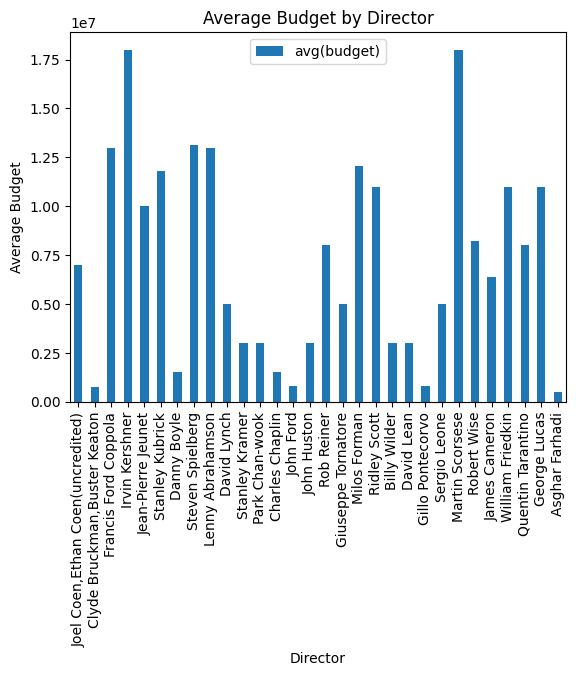

In [17]:
pandas_data.plot(kind="bar", y="avg(budget)")
plt.title("Average Budget by Director")
plt.xlabel("Director")
plt.ylabel("Average Budget")
plt.show()

In [18]:
#Director of the movies affecting the budget

In [69]:
selected_data = joined_data.select("cast", col("gross").cast(DoubleType())).filter(col("gross").isNotNull())

filtered_data = selected_data.filter(col("gross") > 0)

grouped_data = filtered_data.groupBy("cast", "gross").agg(count("*").alias("count"))

sorted_data = grouped_data.orderBy("cast", "gross")

sorted_data.show()

grouped_data1 = filtered_data.groupBy("cast").agg(avg("gross"))
pandas_data = grouped_data1.toPandas()
pandas_data.set_index("cast", inplace=True)

+--------------------+---------+-----+
|                cast|    gross|count|
+--------------------+---------+-----+
|Buster Keaton, Sy...|  27816.0|    2|
|Buster Keaton, Sy...|  29815.0|    2|
|Buster Keaton, Sy...|  91666.0|    2|
|Buster Keaton, Sy...| 191125.0|    2|
|Buster Keaton, Sy...| 409144.0|    2|
|Buster Keaton, Sy...| 449702.0|    2|
|Buster Keaton, Sy...| 529766.0|    2|
|Buster Keaton, Sy...| 560069.0|    2|
|Buster Keaton, Sy...| 618847.0|    2|
|Buster Keaton, Sy...| 649626.0|    2|
|Buster Keaton, Sy...| 999382.0|    2|
|Buster Keaton, Sy...|1060264.0|    2|
|Buster Keaton, Sy...|1246141.0|    2|
|Buster Keaton, Sy...|1257142.0|    2|
|Buster Keaton, Sy...|1467396.0|    2|
|Buster Keaton, Sy...|2144667.0|    2|
|Buster Keaton, Sy...|2433850.0|    2|
|Buster Keaton, Sy...|2584988.0|    2|
|Buster Keaton, Sy...|2674090.0|    2|
|Buster Keaton, Sy...|2704951.0|    2|
+--------------------+---------+-----+
only showing top 20 rows



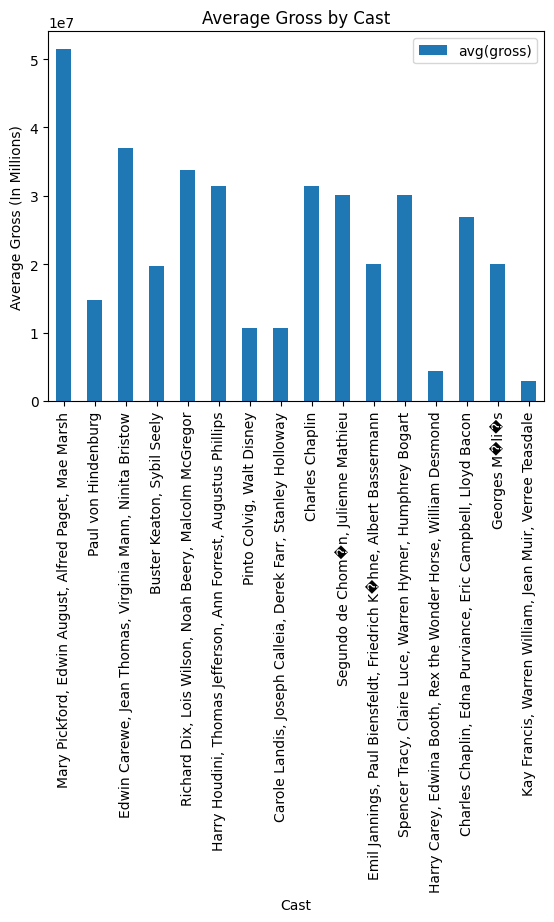

In [71]:
pandas_data.plot(kind="bar", y="avg(gross)")
plt.title("Average Gross by Cast")
plt.xlabel("Cast")
plt.ylabel("Average Gross (In Millions)")
plt.show()